___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# RNN Exercise

**TASK: IMPORT THE BASIC LIBRARIES YOU THINK YOU WILL USE**

In [266]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

# Project Tasks

**TASK: Read in the data set "Frozen_Dessert_Production.csv" from the Data folder. Figure out how to set the date to a datetime index columns**

In [267]:
df = pd.read_csv('Frozen_Dessert_Production.csv')

In [268]:
df.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573 entries, 0 to 572
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       573 non-null    object 
 1   IPN31152N  573 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.1+ KB


In [270]:
df["DATE"] = pd.to_datetime(df["DATE"], format="%Y-%m-%d")
df.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [271]:
# set the DATE column as index 
df.set_index('DATE', inplace=True)
df.head() 

,IPN31152N
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


**Task: Change the column name to Production**

In [272]:
# change column name from IPN31152N to Production 
df = df.rename(columns={'IPN31152N': 'Production'})

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Production  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


**TASK: Plot out the time series**

<Axes: xlabel='DATE', ylabel='Production'>

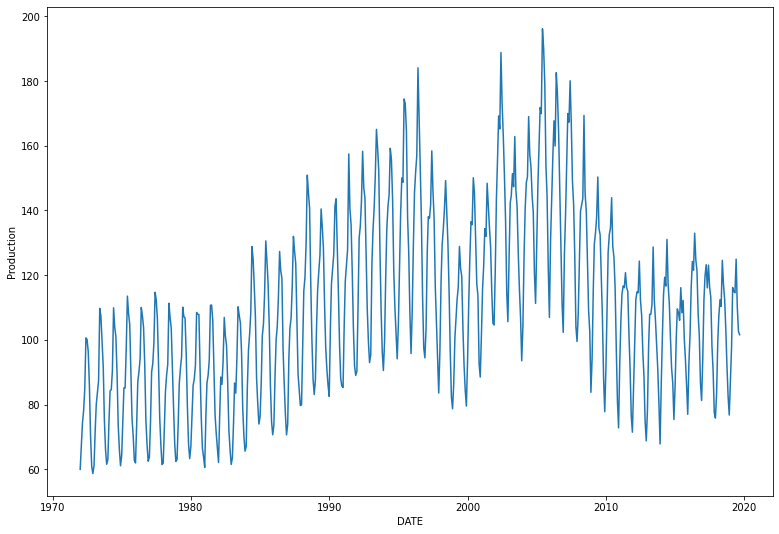

In [274]:
# repair code 
plt.figure(figsize=(13,9))
sns.lineplot(data=df, x=df.index, y='Production')

## Train Test Split

**TASK: Figure out the length of the data set**

In [275]:
len(df)

573

**TASK: Split the data into a train/test split where the test set is the last 24 months of data.**

In [276]:
test_set = df[-24:]
len(test_set)

24

In [277]:
train_set = df[:-24]
len(train_set)

549

In [278]:
#Check the lengths
len(train_set) + len(test_set)

573

## Scale Data

**TASK: Use a MinMaxScaler to scale the train and test sets into scaled versions.**

In [279]:
from sklearn.preprocessing import MinMaxScaler

In [280]:
scaler = MinMaxScaler()

In [281]:
train_set_scaled = train_set.copy()

In [282]:
train_set_scaled['Production'] = scaler.fit_transform(train_set[['Production']])
#train_set_scaled = train_set_scaled.to_numpy()

In [283]:
test_set_scaled = test_set.copy()
test_set_scaled['Production'] = scaler.transform(test_set[['Production']])
#test_set_scaled = test_set_scaled.to_numpy()

# Time Series Generator

**TASK: Create a TimeSeriesGenerator object based off the scaled_train data. The batch length is up to you, but at a minimum it should be at least 18 to capture a full year seasonality.**

In [284]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [285]:
length = 22
train_generator = TimeseriesGenerator(train_set_scaled.to_numpy(), train_set_scaled.to_numpy(), length=length, batch_size=1)

In [286]:
x,y = train_generator[0]

### Create the Model

**TASK: Create a Keras Sequential Model with as many LSTM units you want and a final Dense Layer.**

In [287]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# define the number of input time steps and features
n_features = 1 # since I have a univariate time series

# create a sequential model
model = Sequential()

# add an LSTM layer with 32 units
model.add(LSTM(100,activation='relu', input_shape=(length, n_features)))

# add a final Dense layer with 1 unit
model.add(Dense(1,activation='linear'))

# compile the model with mean squared error loss and adam optimizer
model.compile(loss='mse', optimizer='adam')

# print the model summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100)               40800     
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


**TASK: Create a generator for the scaled test/validation set. NOTE: Double check that your batch length makes sense for the size of the test set as mentioned in the RNN Time Series video.**

In [288]:
test_generator = TimeseriesGenerator(test_set_scaled.to_numpy(), test_set_scaled.to_numpy(), length=length, batch_size=1)

**TASK: Create an EarlyStopping callback based on val_loss.**

In [289]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", patience=2)

**TASK: Fit the model to the generator, let the EarlyStopping dictate the amount of epochs, so feel free to set the parameter high.**

In [290]:
# Fit the model with the generators and the early_stop
model.fit(train_generator, epochs=25, validation_data=test_generator, callbacks=[early_stop])

Epoch 1/25
527/527 [==============================] - 5s 7ms/step - loss: 0.0293 - val_loss: 1.6770e-05
Epoch 2/25
527/527 [==============================] - 4s 7ms/step - loss: 0.0110 - val_loss: 0.0022
Epoch 3/25
527/527 [==============================] - 4s 7ms/step - loss: 0.0045 - val_loss: 0.0046


**TASK: Plot the history of the loss that occured during training.**

<Axes: >

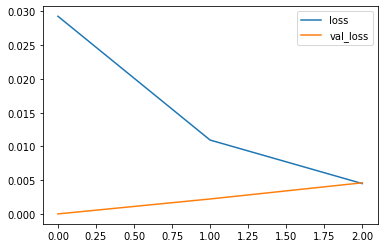

In [291]:
pd.DataFrame(model.history.history).plot()

## Evaluate on Test Data

**TASK: Forecast predictions for your test data range (the last 12 months of the entire dataset). Remember to inverse your scaling transformations. Your final result should be a DataFrame with two columns, the true test values and the predictions.**

In [292]:
test_outputs = []
batch = train_set_scaled[-length:].to_numpy().reshape((1,length,n_features))

for i in range(len(test_set)):
    test_out = model.predict(batch)[0]
    test_outputs.append(test_out)
    batch = np.append(batch[:,1:,:],[[test_out]],axis=1)

1/1 [==============================] - 0s 23ms/step


In [293]:
batch

array([[[0.1861209 ],
        [0.25736448],
        [0.34422553],
        [0.41080612],
        [0.45247665],
        [0.46508744],
        [0.43112549],
        [0.35645014],
        [0.25743195],
        [0.16330278],
        [0.10354487],
        [0.10366711],
        [0.16677886],
        [0.26255634],
        [0.34120262],
        [0.39513707],
        [0.42489067],
        [0.42453092],
        [0.38016334],
        [0.30039933],
        [0.2034249 ],
        [0.11711977]]])

In [294]:
test_outputs

[array([0.20457864], dtype=float32),
 array([0.16869846], dtype=float32),
 array([0.1861209], dtype=float32),
 array([0.25736448], dtype=float32),
 array([0.34422553], dtype=float32),
 array([0.41080612], dtype=float32),
 array([0.45247665], dtype=float32),
 array([0.46508744], dtype=float32),
 array([0.4311255], dtype=float32),
 array([0.35645014], dtype=float32),
 array([0.25743195], dtype=float32),
 array([0.16330278], dtype=float32),
 array([0.10354487], dtype=float32),
 array([0.10366711], dtype=float32),
 array([0.16677886], dtype=float32),
 array([0.26255634], dtype=float32),
 array([0.34120262], dtype=float32),
 array([0.39513707], dtype=float32),
 array([0.42489067], dtype=float32),
 array([0.42453092], dtype=float32),
 array([0.38016334], dtype=float32),
 array([0.30039933], dtype=float32),
 array([0.2034249], dtype=float32),
 array([0.11711977], dtype=float32)]

In [295]:
lstm_predictions = scaler.inverse_transform(test_outputs)

In [296]:
test_set['Predictions'] = lstm_predictions

<ipython-input-296-51fb0ea6d85d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Predictions'] = lstm_predictions


In [297]:
test_set

,Production,Predictions
DATE,,
2017-10-01,90.4732,86.792206
2017-11-01,77.4378,81.858183
2017-12-01,75.8118,84.254010
2018-01-01,83.4343,94.050994
2018-02-01,99.4899,105.995595
2018-03-01,107.3152,115.151352
2018-04-01,112.4309,120.881629
2018-05-01,110.3544,122.615788
2018-06-01,124.5841,117.945548


**TASK: Plot your predictions versus the True test values. (Your plot may look different than ours).**

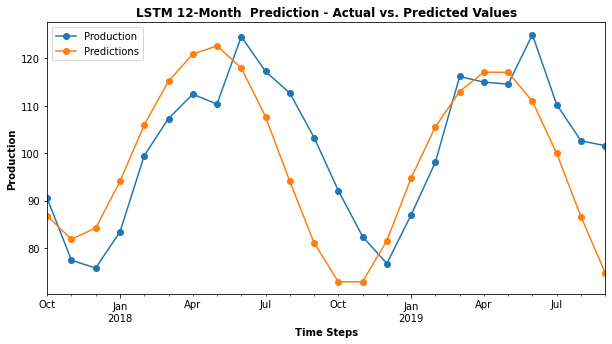

In [298]:
test_set.plot(figsize=(10,5),marker='o',linestyle='-');
plt.title('LSTM 12-Month  Prediction - Actual vs. Predicted Values',fontweight='bold')
plt.ylabel('Production',fontweight='bold')
plt.xlabel('Time Steps',fontweight='bold');

**TASK: Calculate your RMSE.**

In [299]:
# calculate the RMSE of  the model predictions. 
from sklearn.metrics import mean_squared_error

# true values
y_true = test_set['Production'].values

# predicted values
y_pred = test_set['Predictions'].values

# compute RMSE
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print(f"Root Mean Square Error (RMSE): {rmse}")

Root Mean Square Error (RMSE): 11.928404103255776
